# Email Spam Detection
The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).


# importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

# loading dataset

In [3]:
df=pd.read_csv("spam.csv",encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={"v1":"msg Type","v2":"msg content"},inplace=True)

In [7]:
df.columns

Index(['msg Type', 'msg content'], dtype='object')

In [8]:
df['spam']=df['msg Type'].apply(lambda a: 0 if a =='ham' else 1)
df.tail()

,msg Type,msg content,spam
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [9]:
df.groupby("spam").describe()

msg Type                    msg content         \
        count unique   top  freq       count unique   
spam                                                  
0        4825      1   ham  4825        4825   4516   
1         747      1  spam   747         747    653   

                                                              
                                                    top freq  
spam                                                          
0                                Sorry, I'll call later   30  
1     Please call our customer service representativ...    4

In [10]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [11]:
b=pd.DataFrame()
b['datatype']=df.dtypes
b.index.name="columns"
b

,datatype
columns,
msg Type,object
msg content,object
spam,int64


In [12]:
df.isnull().sum()

msg Type       0
msg content    0
spam           0
dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df["msg content"],df["spam"],test_size=0.3,random_state=0)

In [14]:
cv=CountVectorizer()

In [15]:
x_train=cv.fit_transform(x_train)

In [16]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
cv.vocabulary_

{'mathews': 3996,
 'or': 4531,
 'tait': 6096,
 'edwards': 2332,
 'anderson': 860,
 'ok': 4478,
 'take': 6099,
 'care': 1507,
 'umma': 6513,
 'to': 6329,
 'you': 7051,
 'too': 6365,
 'don': 2217,
 'make': 3946,
 'life': 3740,
 'stressfull': 5943,
 'always': 834,
 'find': 2611,
 'time': 6299,
 'laugh': 3678,
 'it': 3440,
 'may': 4009,
 'not': 4398,
 'add': 719,
 'years': 7026,
 'your': 7056,
 'but': 1427,
 'surely': 6039,
 'adds': 726,
 'more': 4171,
 'ur': 6575,
 'gud': 2993,
 'ni8': 4340,
 'swt': 6074,
 'dreams': 2255,
 'great': 2966,
 'new': 4331,
 'offer': 4462,
 'double': 2233,
 'mins': 4096,
 'txt': 6480,
 'on': 4494,
 'best': 1196,
 'orange': 4535,
 'tariffs': 6121,
 'and': 859,
 'get': 2854,
 'latest': 3676,
 'camera': 1478,
 'phones': 4730,
 'free': 2726,
 'call': 1459,
 'mobileupd8': 4138,
 '08000839402': 45,
 'now': 4410,
 '2stoptxt': 372,
 'cs': 1924,
 'the': 6218,
 'beauty': 1154,
 'of': 4456,
 'is': 3430,
 'in': 3333,
 'next': 4338,
 'second': 5439,
 'which': 6847,
 'hides'

In [18]:
model=MultinomialNB()

In [19]:
model.fit(x_train,y_train)

MultinomialNB()

In [20]:
model.predict(x_train[5])

array([0], dtype=int64)

In [21]:
x_test_cv=cv.transform(x_test)
y_pred = model.predict(x_test_cv)

In [22]:
c=np.stack((y_test.values,y_pred),axis=1)
c

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [23]:
result=pd.DataFrame()
result['Actual']=y_test.values
result['Predict']=y_pred
result

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1667,0,0
1668,0,0
1669,0,0
1670,0,0


In [24]:
sam=['my name is prince']
sam=cv.transform(sam)
sam.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
input1=input("send the mail :  ")
input1=cv.transform([input1])
result=model.predict(input1)
"ham_mail" if result == 1 else "spam_mail"

send the mail :  sedrfghjkkklkghb


'spam_mail'

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9838516746411483

In [27]:
df['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

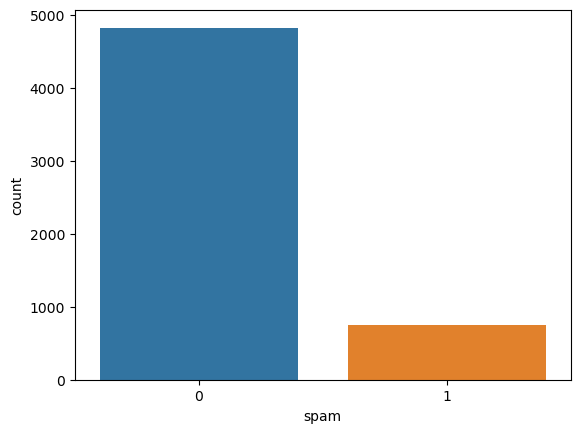

In [32]:
import seaborn as sns
sns.countplot(x='spam',data=df)